In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

### Creating Minibatches Of Dataset

In [2]:
def random_mini_batches(X,Y,mini_batch_size=64,seed=0):
    np.random.seed(seed) 
    m = X.shape[1]
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(num_complete_minibatches):
        
        mini_batch_X = shuffled_X[:,k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k*mini_batch_size:(k+1)*mini_batch_size]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[:,mini_batch_size*(num_complete_minibatches):m]
        mini_batch_Y = shuffled_Y[:,mini_batch_size*(num_complete_minibatches):m]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

### Update Parameters

In [3]:
def update_parameters(parameters,grads,learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural networks
    # Update rule for each parameter
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W"+str(l+1)] - learning_rate*(grads["dW"+str(l+1)])
        parameters["b" + str(l+1)] = parameters["b"+str(l+1)] - learning_rate*(grads["db"+str(l+1)])
    return parameters

### Loading Dataset
The dataset is named "moons" because the data from each of the two classes looks a bit like a crescent-shaped moon.

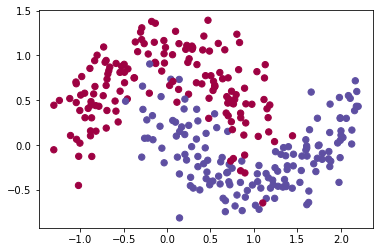

In [4]:
train_X, train_Y = load_dataset()

### Model

In [6]:
def model(X,Y,layers_dims,learning_rate,mini_batch_size,epochs): #In batch Gradient Descent - epochs == iterations
    L = len(layers_dims)
    seed = 10                        
    m = X.shape[1]  
    
    parameters = initialize_parameters(layers_dims)
    
    for i in range(epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:
            
            (minibatch_X, minibatch_Y) = minibatch
            
            AL, caches = forward_propagation(minibatch_X, parameters)
            
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)
            
            parameters = update_parameters(parameters,grads,learning_rate)
            
        
    return parameters            

### Architecture

In [7]:
layers_dims = [train_X.shape[0], 5, 2, 1]

In [8]:
import time

### Training

In [9]:
tic = time.time()
final_parameters = model(train_X,train_Y,layers_dims,learning_rate=0.0007,mini_batch_size=64,epochs=10000)
toc = time.time()

print('Training time : ',toc-tic,'seconds')

Training time :  4.566139221191406 seconds


### Predictions

In [10]:
predictions = predict(train_X, train_Y, final_parameters)

Accuracy: 0.7966666666666666


### Decision Boundry

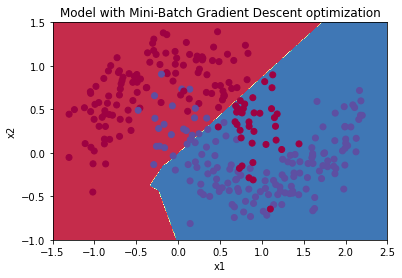

In [11]:
# Plot decision boundary
plt.title("Model with Mini-Batch Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(final_parameters, x.T), train_X, train_Y)